In [33]:
# pip install ucimlrepo


  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ucimlrepo import fetch_ucirepo
from typing import Tuple, List, Dict

#### 6.1

Quantidade de missclassifications: 0


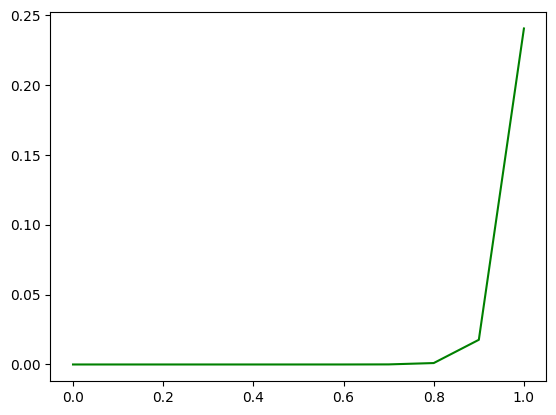

In [21]:
def adjustData(x, y):
    P = x.shape[1]
    N = x.shape[0] - 1
    res = [np.ones(P), x[0,:]]
    return np.array(res), np.array(y[N])

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def least_squares_sigmoid(
    x: np.array, 
    y: np.array, 
    w: np.array
):
    P = x.shape[1]
    N = x.shape[0]
    cost = 0
    for p in range(P):
        x_p = x[:,p]
        y_p = y[p]
        cost += sigmoid(np.dot(x_p, w) - y_p) ** 2
    return cost / P

def least_squares_sigmoid_gradient(
    x: np.array, 
    y: np.array, 
    w: np.array
):
    P = x.shape[1]
    N = x.shape[0]
    grad = 0
    for p in range(P): # porque somos o gradiente para todos os pontos ?
        x_p = x[:,p]
        y_p = y[p]
        grad += (y_p - sigmoid(np.dot(x_p, w))) * x_p
    return -grad / P


def gradiente_descendente(
    x: np.array, 
    y: np.array, 
    w: np.array,
    max_ints: int,
    alpha: float  
):
    historic_cost = [least_squares_sigmoid(x, y, w)]
    historic_w = [w]
    for _ in range(max_ints):
        grad_eval = least_squares_sigmoid_gradient(x, y, w)
        grad_norm = np.linalg.norm(grad_eval)
        grad_eval /= grad_norm
        w = w - alpha * grad_eval # menos ou mais alpha ?
        cost = least_squares_sigmoid(x, y, w)
        historic_w.append(w)
        historic_cost.append(cost)
    return w, historic_w, historic_cost


# load in data 
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
X = data[:-1,:]
Y = data[-1:,:] 
w = np.array([20, -20])

X, Y = adjustData(X, Y)

P = X.shape[1]
N = X.shape[0]
iterations = 1000
alpha = 0.1

last_w, historic_w, historic_cost = gradiente_descendente(X, Y, w, iterations, alpha)
missclassifications = 0

# Missclassifications
for p in range(P):
    x_p = X[:,p]
    y_p = Y[p]
    res_x = sigmoid(np.dot(x_p, last_w))
    res_y = y_p
    if res_x >= 0.75:
        res_x = 1
    if res_x <= 0.25:  
        res_x = 0
    if res_x != res_y:
        missclassifications += 1

print("Quantidade de missclassifications:", missclassifications)

# Plot da solução
x_plots = np.linspace(0,1,P)
x_points = np.array([np.ones(P), x_plots]) 
y_plots = [sigmoid(np.dot(x_points[:,p], last_w)) for p in range(P)]
plt.plot(x_plots, y_plots, 'g')
plt.show()


#### 6.7)

In [49]:
def adjustData(
    x: np.array, 
    y: np.array
) -> Tuple[np.array, np.array]:
    P = x.shape[1]
    N = x.shape[0] - 1
    res = [np.ones(P), x[0,:]]
    return np.array(res), np.array(y[N])

def softmax(
    x: np.array, 
    y: np.array, 
    w: np.array
):
    P = x.shape[1]
    N = x.shape[0]
    cost = 0
    for p in range(P):
        x_p = x[:,p]
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p * np.dot(x_p, w)))
    return cost / P

def softmax_gradient(
    x: np.array, 
    y: np.array, 
    w: np.array
):
    P = x.shape[1]
    N = x.shape[0]
    grad = np.zeros(N)
    for p in range(P):
        x_p = x[:,p]
        y_p = y[p]
        c = np.log(1 + np.exp(-y_p * np.dot(x_p, w)))
        grad += c / (1 + c) * y_p * x_p
    return -grad / P
    

def softmax_gradiente_descendente(
    x: np.array, 
    y: np.array, 
    w: np.array,
    max_its: int,
    alpha: float  
):
    historic_cost = [softmax(x, y, w)]
    historic_w = [w]
    for _ in range(max_its):
        grad_eval = softmax_gradient(x, y, w)
        w = w - alpha * grad_eval
        cost = softmax(x, y, w)
        historic_w.append(w)
        historic_cost.append(cost)
    return w, historic_w, historic_cost


# load in data
csvname = '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
X = data[:-1,:]
Y = data[-1:,:] 
w = np.array([3, 3])

X, Y = adjustData(X, Y)

P = X.shape[1]
N = X.shape[0]
iterations = 10000
alpha = 0.1

last_w, historic_w, historic_cost = softmax_gradiente_descendente(X, Y, w, iterations, alpha)
missclassifications = 0

# Missclassifications
for p in range(P):
    x_p = X[:,p]
    y_p = Y[p]
    res_x = 2 * sigmoid(np.dot(x_p, last_w)) - 1
    res_y = y_p
    print(res_x, res_y)

-0.9998355830723136 -1.0
-0.9981101119601736 -1.0
-0.9978175211515103 -1.0
-0.925495506769679 -1.0
-0.16720857430541103 -1.0
0.2823254384612819 1.0
0.9066936068683371 1.0
0.9999999999341225 1.0
0.9999999999942397 1.0
0.9999999999988654 1.0
0.9999999999997766 1.0


#### 6.13

In [64]:
def adjustData(x, y):
    P = x.shape[1]
    N = x.shape[0] - 1
    res = [np.ones(P), x[0,:]]
    for n in range(N):
        x_n = x[n,:]
        res.append(x_n)
    return np.array(res), np.array(y[0])

def cleanData(x: np.array) -> np.array:
    P = x.shape[1]
    N = x.shape[0] - 1
    res_x = []
    for p in range(P):
        x_p = x[:,p]
        if np.isnan(x_p).any():
            continue
        res_x.append(x_p)
    return np.array(res_x).T
    

def perceptron_cost(
    x: np.array,
    y: np.array,
    w: np.array
):
    N = x.shape[0]
    P = x.shape[1]
    cost = 0
    for p in range(P):
        x_p = x[:,p]
        y_p = y[p]
        cost += max(0, -y_p * np.dot(x_p, w))
    return cost / P

def perceptron_gradient(
    x: np.array,
    y: np.array,
    w: np.array
) -> np.array:
    N = x.shape[0]
    P = x.shape[1]
    grad = np.zeros(N)
    for p in range(P):
        x_p = x[:,p]
        y_p = y[p]
        if -y_p * np.dot(x_p, w) < 0:
            k = 0
        else:
            k = -y[p]
        grad += k * x_p
    return grad / P
    

def perceptron_gradiente_descendente(
    x: np.array,
    y: np.array,
    w: np.array,
    max_its: int,
    alpha: float,
):
    historic_cost = [perceptron_cost(x, y, w)]
    historic_w = [w]
    for _ in range(max_its):
        grad_eval = perceptron_gradient(x, y, w)
        w = w - alpha * grad_eval
        cost = perceptron_cost(x, y, w)
        historic_w.append(w)
        historic_cost.append(cost)
    return w, historic_w, historic_cost


def get_missclassifications(
    x: np.array,
    y: np.array,
    w_perceptron: np.array,
    w_softmax: np.array,
) -> Tuple[int, int]:
    N = x.shape[0]
    P = x.shape[1]
    softmax_missclassifications = 0
    perceptron_missclassifications = 0
    for p in range(P):
        x_p = x[:,p]
        y_p = y[p]
        res_softmax = round(2 * sigmoid(np.dot(x_p, w_softmax)) + 2)
        res_perceptron = -y_p * np.dot(x_p, w_perceptron)
        if res_perceptron > 0:
            perceptron_missclassifications += 1
        if res_softmax != y_p:
            softmax_missclassifications += 1
        print("\ny(p):", y_p)
        print("softmax:", res_softmax)
        print("perceptron:", res_perceptron)

    return softmax_missclassifications, perceptron_missclassifications


breast_cancer_wisconsin_original = fetch_ucirepo(id=15)
X = breast_cancer_wisconsin_original.data.features.T.to_numpy()
Y = breast_cancer_wisconsin_original.data.targets.T.to_numpy()

X, Y = adjustData(X, Y)
X = cleanData(X)

N = X.shape[0]
P = X.shape[1]
w = np.ones(N)

max_its = [1000]
alpha = 10

for its in max_its:
    soft_last_w, soft_historic_w, soft_historic_cost = softmax_gradiente_descendente(X, Y, w, its, alpha)
    perc_last_w, perc_historic_w, perc_historic_cost = perceptron_gradiente_descendente(X, Y, w, its, alpha)
    soft_miss, perc_miss = get_missclassifications(X, Y, perc_last_w, soft_last_w)
    print("softmax - missclassifications:", soft_miss)
    print("perceptron - missclassifications:", perc_miss)




y(p): 2
softmax: 4
perceptron: -42.0

y(p): 2
softmax: 4
perceptron: -92.0

y(p): 2
softmax: 4
perceptron: -36.0

y(p): 2
softmax: 4
perceptron: -94.0

y(p): 2
softmax: 4
perceptron: -42.0

y(p): 4
softmax: 4
perceptron: -312.0

y(p): 2
softmax: 4
perceptron: -44.0

y(p): 2
softmax: 4
perceptron: -32.0

y(p): 2
softmax: 4
perceptron: -26.0

y(p): 2
softmax: 4
perceptron: -38.0

y(p): 2
softmax: 4
perceptron: -24.0

y(p): 2
softmax: 4
perceptron: -28.0

y(p): 4
softmax: 4
perceptron: -132.0

y(p): 2
softmax: 4
perceptron: -30.0

y(p): 4
softmax: 4
perceptron: -260.0

y(p): 4
softmax: 4
perceptron: -172.0

y(p): 2
softmax: 4
perceptron: -36.0

y(p): 2
softmax: 4
perceptron: -38.0

y(p): 4
softmax: 4
perceptron: -240.0

y(p): 2
softmax: 4
perceptron: -46.0

y(p): 4
softmax: 4
perceptron: -216.0

y(p): 4
softmax: 4
perceptron: -256.0

y(p): 2
softmax: 4
perceptron: -32.0

y(p): 4
softmax: 4
perceptron: -52.0

y(p): 2
softmax: 4
perceptron: -76.0

y(p): 4
softmax: 4
perceptron: -64.0

y(p)